<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de clientes

Crear un modelo de segmentación para la estimación de los tipos de clientes que van de compras a un shoping<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Mall_Customers.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv > Mall_Customers.csv
    else:
        !wget Mall_Customers.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv

--2023-04-07 09:18:45--  http://mall_customers.csv/
Resolving mall_customers.csv (mall_customers.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘mall_customers.csv’
--2023-04-07 09:18:45--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2023-04-07 09:18:46 (46.8 MB/s) - ‘Mall_Customers.csv’ saved [3981/3981]

FINISHED --2023-04-07 09:18:46--
Total wall clock time: 0.3s
Downloaded: 1 files, 3.9K in 0s (46.8 MB/s)


### `Mall_Customers.csv`:
El dataset **`Mall_Customers.csv`** contiene datos sobre clientes que asisten al shopping a comprar, y sus características de consumo.<br>
[Dataset source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- **CustomerID** --> id del comprador, ejemplo 5
- **Gender** --> género, masculino (Male) o femenino (female)
- **Age** --> edad
- **Annual Income** --> ingreso de dinero anual de la persona en miles de dolares
- **Spending socre** --> que tan gastador es la persona (de 1 a 100)

In [3]:
df = pd.read_csv("Mall_Customers.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Alumno: Los algoritmos de clustering no funcionan bien con las variables categóricas, 
# obtener un nuevo dataset (df2) sin la columna CustomerID y Gender

# Elimino las columnas categóricas indicadas (almaceno en una nueva variable)
df2 = df.drop(['CustomerID', 'Gender'], axis=1)
df2.head()



,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

#Veamos si contiene datos faltantes (agrego filas para visualizarlos en cantidad y valor porcentual)
desc = df2.describe()
desc.loc['Nan'] = df2.isna().sum()
desc.loc['%Nan'] = (df2.isna().mean())*100
desc


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000
Nan,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000


In [7]:
df2.shape

(200, 3)

In [8]:
# Alumno: ¿Cuántas filas/datos hay para analizar?

print('Tamaño de la matriz (n, m) de datos filtrada, con n filas y m columnas: ', df2.shape)
print('Cantidad de filas a analizar: ', df2.shape[0])

Tamaño de la matriz (n, m) de datos filtrada, con n filas y m columnas:  (200, 3)
Cantidad de filas a analizar:  200


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

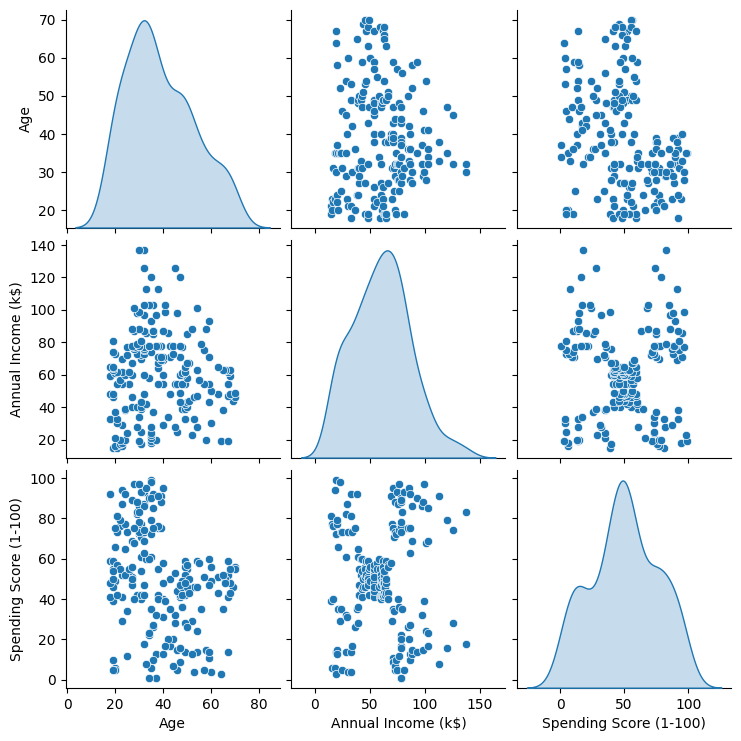

In [9]:
# Observar todas las relaciones entre todos los features, utilizar pairplot

#sns.pairplot(df2)
sns.pairplot(df2, diag_kind = 'kde')
plt.show()

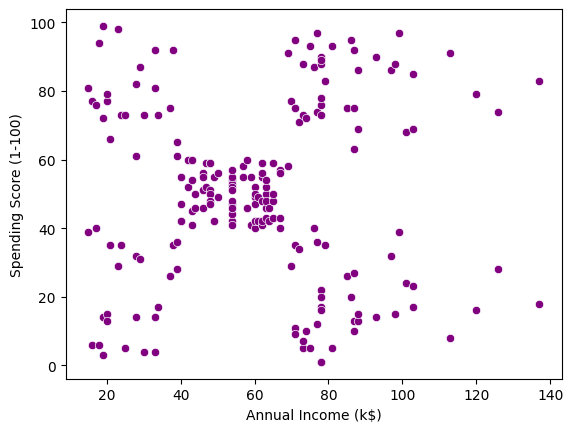

In [10]:
# Alumno: Se puede observar que donde se ve claramente una segmentación de grupos
# en en la relación de "Annual Income" y "Spending Socre"
# Graficar unicamente la relación x=Annual Income con y=SpendingScore
# con un scatter plot

sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', color='Purple')
plt.show()

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [11]:
# Almuno: Crear un numpy array "X" con los features de entrada (Annual Income y Spending Score)

# Para los valores de X, se emplea doble corchete pues recibe un elemento vectorial de tamaño nx1 (en este caso, de 2 componentes).

X = df2[ ['Annual Income (k$)', 'Spending Score (1-100)' ]].values

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [12]:
# Almuno: Entrenar diferentes modelos de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion

#--> Este procedimiento es utilizado para encontrar la cantidad óptima de clusters, entrenando distintos modelos de Kmeans (variando sus parámetros n_cluster sucesivamente) 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definimos una función que realice las iteraciones
def find_best_model(X, top_range=10):
    
    nro_clusters = list(range(2,11)) 
    ensayos = len(nro_clusters)

    # Creamos 2 vectores nulos del tamaño de 'ensayos' que se irán sobreescribiendo: uno, con los errores; otro, con el score, para cada una de las 9 pruebas. 
    vect_error = np.zeros((ensayos))
    vect_score = np.zeros((ensayos))

    for i in range(ensayos):
        #para cada i, se crea un objeto de la clase KMeans. El parámetro que varía en cada iteración, será el nro de clusters según la lista definida en find_best_model
        kmeans = KMeans(n_clusters=nro_clusters[i], init="k-means++", random_state=0)
        #se entrena el objeto creado -el modelo de segmentación-
        kmeans.fit(X)

        #se guardan errores y scores en la posición correspondiente para cada vector, a medida que se ejecuta cada iteración. 
        vect_error[i] = kmeans.inertia_
        vect_score[i] = silhouette_score(X, kmeans.labels_)

    return vect_error, vect_score, nro_clusters;        

    

In [13]:
# Ejecutamos la función (la invocamos)
vect_error, vect_score, nro_clusters = find_best_model(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

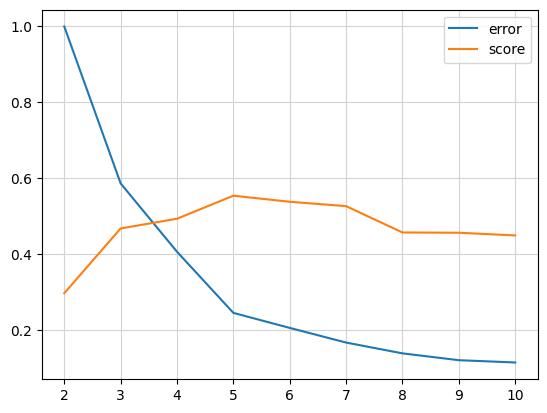


El resultado más óptimo se consigue con 5 clusters.
El mismo, se deduce del elbow point de la curva error.


In [20]:
# Dibujar la evolucion del error (inertia) y deteminar el 
# punto de quiebre (elbow point) para deteminar el mejor k

fig = plt.figure()
ax = fig.add_subplot()

# Graficamos ambas curvas en un mismo sistema de ejes cartesianos: error y score
# n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# vect_error/vect_error.max(), divide cada error por el máximo error
ax.plot(nro_clusters, vect_error/vect_error.max(), label='error');
ax.plot(nro_clusters, vect_score, label ='score')
ax.grid('dashed', color='lightgray')

ax.legend()
plt.show()

best_cluster = nro_clusters[vect_score.argmax()]
print(f'\nEl resultado más óptimo se consigue con {best_cluster} clusters.\nEl mismo, se deduce del elbow point de la curva error.')
    

In [21]:
# Alumno: Entrenar el modelo con el mejor "K" encontrado
# y determinar los labels

# Una vez determinado el mejor k, sobreescribo el objeto kmeans (la clase recibe el k hallado -5- como parámetro)
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)

#lo entreno
kmeans.fit(X)

#determino los labels
labels = kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Alumno: Sumar la columna de labels con el nombre de custseg (customer segmentation)
# a su dataset

df2['CustSeg'] = labels
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),CustSeg
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [23]:
# Alumno: Calcular la exactitud (accuracy) del modelo

#silhouette_score ya fue previamente importada. Calculo directamente la exactitud del modelo:

print(f'Exactitud del modelo de clustering: {round(silhouette_score(X, kmeans.labels_),3)}')



Exactitud del modelo de clustering: 0.554


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

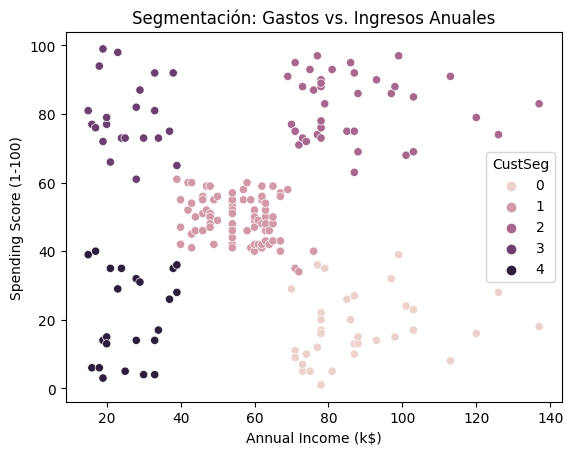

In [24]:
# Alumno: Volver a repetir el gráfico de scatter "Annual Income" y "Spending Socre"
# pero ahora coloreando con "hue" los puntos según su clase de custseg

sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='CustSeg').set(title ='Segmentación: Gastos vs. Ingresos Anuales')
plt.show()